<a href="https://colab.research.google.com/github/madhavth/machine_learning/blob/main/accel_launcher_app_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import random
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.utils import shuffle


In [ ]:
#generating random data for training, x == input, label_y is the expected output and used to train this model

x = []
label_y = []
dc= 7

for i in range(10000):
  rand_time_used = 0.0
  rand_days_used = random.randint(1,dc)

  for j in range(rand_days_used):
    daily_value = round(random.uniform(0.0, 60.00), 4)
    rand_time_used += daily_value

  # send average time used per day
  x.append([rand_time_used, rand_days_used])
  
  prob_time = rand_time_used/(60.0* dc)
  prob_days = rand_days_used/dc

  prob_label_value = prob_time * prob_days
  prob_label_value = prob_time + prob_days - prob_label_value
  label_y.append(prob_label_value)

x = np.array(x)
label_y = np.array(label_y)

x, label_y = shuffle(x,label_y)

In [ ]:
for i in range(10):
  print(f"{x[i]} ===  {label_y[i]}")

[261.3165   7.    ] ===  1.0
[107.4764   3.    ] ===  0.5747978231292518
[36.4432  2.    ] ===  0.34769251700680276
[72.126  2.   ] ===  0.4083775510204082
[109.1833   3.    ] ===  0.5771201360544218
[59.8946  1.    ] ===  0.26509102040816324
[144.8147   5.    ] ===  0.8127991156462585
[26.6266  1.    ] ===  0.19719714285714285
[99.8061  3.    ] ===  0.5643620408163265
[107.5325   3.    ] ===  0.5748741496598638


In [ ]:
#create and defined the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[2]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.0001), loss = 'mean_squared_error', metrics =['mean_absolute_error', 'mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 #training the model
 history = model.fit(x = x,y= label_y, epochs= 250, validation_split=0.1, batch_size= 10,verbose = 2)

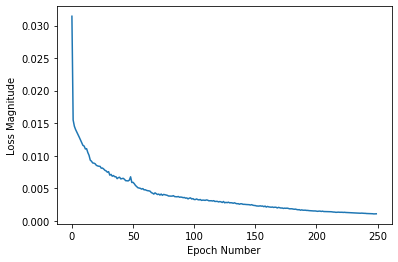

In [ ]:
#plotting helps visualize loss reductions as model is optimized

import matplotlib.pyplot as plt
def plot_something():
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss Magnitude')
  plt.plot(history.history['loss'])

plot_something()

In [ ]:
#download file from colab
from google.colab import files
def download_files():
  files.download('app_recommendation.tflite')

In [ ]:
#save the model from memory to file in colab
model.save('app_recomm.h5', save_format='h5')

In [ ]:
# convert the model using tfliteconverter
model = tf.keras.models.load_model('app_recomm.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflmodel = converter.convert()
file = open( 'app_recommendation.tflite' , 'wb' ) 
file.write( tflmodel )

INFO:tensorflow:Assets written to: /tmp/tmpbbc01zo6/assets


19240

In [ ]:
#download the .tflite file
download_files()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#used to evaluate the model - 
#first value is the number of minutes the app has been used in this case . (0 - 420) suitable range
#second parameter is the number of days app has been opened . (1-7) suitable range
model.predict([[2, 5]])

array([[0.6004846]], dtype=float32)

In [ ]:
!ls

app_recommendation.tflite  app_recomm.h5  sample_data


In [ ]:

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="app_recommendation.tflite")
interpreter.allocate_tensors()

In [ ]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Test model on random input data.
input_shape = input_details[0]['shape']

#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)

input_data = np.array([[100, 7]], dtype=np.float32)

interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[1.0197847]]
